# The Simons Observatory Large Aperture Telescope Optics Tube Simulation

### Grace E. Chesmore - McMahonCosmologyGroup
We will simulate the beam of the SO LAT optics tube using a ray-tracing technique. These simulations are compared to the holography measurements performed on the LAT Receiver tester at the University of Chicago. 

## 1. Ray Tracing from the Focal Plane out the Window

The following shows a simple ray trace from the focal plane (orange) to the holography measurement plane (dark blue).  The three ray traces show the beam path as seen by three spots on the focal plane.  This can be used to estimate the size of the beam measured at a given distance from the focal plane, for example.

The optical elements considered in the simulation, and their roles are:
* Three lenses: Control the shape of the beam.
* Focal Plane: Houses the detectors cooled to 100mK.  For LATRt holography measurements, the focal plane was cooled to 4K to protect the Pacific Millimeter detectors. 
* Source Plane: The holography source aims into the optics tube, and moves in this XY plane to make the full beam map.
* Lyot Stop: Defines the size of the beam in the far-field.
* 4K Filter: Blocks unwanted IR signal from entering the optics tube. 

In [3]:
import numpy as np
import matplotlib
import matplotlib.font_manager as font_manager
# %load_ext blackcellmagic
import matplotlib.pyplot as plt
# import plotly
# import plotly.graph_objects as go
# plotly.offline.init_notebook_mode()

%matplotlib inline
font_manager.fontManager.addfont(
    "/home/chesmore/.local/share/fonts/HelveticaNeueLight.ttf"
)
matplotlib.rcParams["font.family"] = "Helvetica Neue"
matplotlib.rcParams["font.size"] = 16
# from matplotlib_scalebar.scalebar import ScaleBar
matplotlib.rcParams.update({"axes.grid" : False, "grid.color": "grey", "grid.alpha": .2, 'xtick.direction':'in','ytick.direction':'in'})
%config InlineBackend.figure_format = 'retina'

import sys
path_to_package = "/home/chesmore/Desktop/Code/solat-optics"
sys.path.append(path_to_package) 

import solat_optics as slo
from solat_optics import *
from solat_optics.ot_geo import *
import solat_optics.ray_trace_int as rti
import solat_optics.ot_geo as ot_geo
# import solat_optics.ray_trace as ray_trace
# %load_ext blackcellmagic

tele_geo = ot_geo.LatGeo()
tele_geo.y_ap = -1212 # Source distance from focal plane [mm]
tele_geo.n_scan = 100

class plotOpts:
    
    plot = 0
    if plot==1:
        fig,ax = plt.subplots(figsize = (10,5.5))
    color = 'darkorange'
    alpha = .2
  

In [ ]:
  
x_arr = np.linspace(-(392 / 2), (392 / 2), 200)  # [mm]
y_arr = np.linspace(-(392 / 2), (392 / 2), 200)  # [mm]
x_arr, y_arr = np.meshgrid(x_arr, y_arr)
x_3 = np.linspace(-((374 - 8) / 2), ((374 - 8) / 2), 200)  # [mm]
y_3 = np.linspace(-((374 - 8) / 2), ((374 - 8) / 2), 200)  # [mm]
x_3, y_3 = np.meshgrid(x_3, y_3)

z_fp = 0*x_arr

x_2 = np.linspace(-(352 / 2), (352 / 2), 200)  # [mm]
y_2 = np.linspace(-(352 / 2), (352 / 2), 200)  # [mm]
x_2, y_2 = np.meshgrid(x_2, y_2)

x_lyot = np.linspace(-136.54 / 2, 136.54 / 2, 200)  # [mm]
y_lyot = np.linspace(-136.54 / 2, 136.54 / 2, 200)  # [mm]
x_lyot, y_lyot = np.meshgrid(x_lyot, y_lyot)

r_arr = np.sqrt(x_arr ** 2 + y_arr ** 2)
r_2 = np.sqrt(x_2 ** 2 + y_2 ** 2)
r_3 = np.sqrt(x_3 ** 2 + y_3 ** 2)

z1_a = z1a(x_arr, y_arr)
z1_b = z1b()
z1_a = np.where(r_arr < (392 / 2), z1_a, np.nan)
z1_b = np.where(r_arr < (392 / 2), z1_b, np.nan)

z2_a = z2a(x_2, y_2)
z2_b = z2b()
z2_a = np.where(r_2 < (352 / 2), z2_a, np.nan)
z2_b = np.where(r_2 < (352 / 2), z2_b, np.nan)

z3_a = z3a(x_3, y_3)
z3_b = z3b(x_3, y_3)
z3_a = np.where(r_3 < ((374 - 8) / 2), z3_a, np.nan)
z3_b = np.where(r_3 < ((374 - 8) / 2), z3_b, np.nan)

z_fp = np.where(r_arr < ((300) / 2), z_fp, np.nan)

xt1b, yt1b, zt1b = m1b_into_tele(x_arr, y_arr, z1_b)
xt1a, yt1a, zt1a = m1a_into_tele(x_arr, y_arr, z1_a)

xt2b, yt2b, zt2b = m2b_into_tele(x_2, y_2, z2_b)
xt2a, yt2a, zt2a = m2a_into_tele(x_2, y_2, z2_a)

xt3b, yt3b, zt3b = m3b_into_tele(x_3, y_3, z3_b)
xt3a, yt3a, zt3a = m3a_into_tele(x_3, y_3, z3_a)

x_fp, y_fp, z_fp = fp_into_tele(x_arr, y_arr, z_fp)

plot_xt1a = go.Surface(
                        x = xt1a,
                        y = yt1a,
                        z = zt1a,
                        surfacecolor=z1_a, 
                        colorscale='Greys',
                        showscale= False, 
                        name = 'Lens 1 Back',
                        text="Lens 1 Back", 
                        showlegend = True, 
                        hoverinfo="name"
                    )
plot_xt1b = go.Surface(
                        x = xt1b,
                        y = yt1b,
                        z = zt1b,
                        surfacecolor=z1_b, 
                        colorscale='Greys',
                        showscale= False, 
                        name = 'Lens 1 Front',
                        text="Lens 1 Front", 
                        showlegend = True, 
                        hoverinfo="name"
                    )
plot_xt2a = go.Surface(
                        x = xt2a,
                        y = yt2a,
                        z = zt2a,
                        surfacecolor=z2_a, 
                        colorscale='Greys',
                        showscale= False, 
                        name = 'Lens 2 Back',
                        text="Lens 2 Back", 
                        showlegend = True, 
                        hoverinfo="name"
                    )
plot_xt2b = go.Surface(
                        x = xt2b,
                        y = yt2b,
                        z = zt2b,
                        surfacecolor=z2_b, 
                        colorscale='Greys',
                        showscale= False, 
                        name = 'Lens 2 Front',
                        text="Lens 2 Front", 
                        showlegend = True, 
                        hoverinfo="name"
                    )

plot_xt3a = go.Surface(
                        x = xt3a,
                        y = yt3a,
                        z = zt3a,
                        surfacecolor=z3_a, 
                        colorscale='Greys',
                        showscale= False, 
                        name = 'Lens 3 Back',
                        text="Lens 3 Back", 
                        showlegend = True, 
                        hoverinfo="name"
                    )
plot_xt3b = go.Surface(
                        x = xt3b,
                        y = yt3b,
                        z = zt3b,
                        surfacecolor=z3_b, 
                        colorscale='Greys',
                        showscale= False, 
                        name = 'Lens 3 Front',
                        text="Lens 3 Front", 
                        showlegend = True, 
                        hoverinfo="name"
                    )
plot_fp = go.Surface(
                        x = x_fp,
                        y = y_fp,
                        z = z_fp,
                        surfacecolor=z_fp*0 + .5, 
                        colorscale='Greys',
                        showscale= False, 
                        opacity = .4,
                        name = 'Focal Plane',
                        text="Focal Plane", 
                        showlegend = True, 
                        hoverinfo="name"
                    )
plot_setup = [plot_xt1a,plot_xt1b,plot_xt2a,plot_xt2b,plot_xt3a,plot_xt3b,plot_fp]

plot_layout = go.Layout(title='LAT Optics Tube', autosize=False,
                  width=1000, height=600,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict(
                                xaxis=dict(visible=False),
                                yaxis=dict(visible=False),
                                zaxis=dict(visible=False),
                                aspectmode='data'),
                )

In [ ]:
affpm = rti.aperature_fields([0,0,0],tele_geo,plotOpts)
F_out = affpm.output()

fp = np.where(F_out[31,:]!=0) #Ignore rays that missed the focal plane
amp_min = np.min(F_out[31,:][fp])
amp_max = np.max(F_out[31,:][fp])
plot_rays = []
x_a_list, y_a_list, z_a_list = [], [], []
amp_list = []
for ii in np.unique(np.random.randint(low=0, high=affpm.n_pts, size=500)):
    if affpm.out[15][ii] !=0 :

        x_a, y_a, z_a = affpm.out[0][ii], affpm.out[1][ii], affpm.out[2][ii]
        x_m1b, y_m1b, z_m1b = affpm.out[3][ii], affpm.out[4][ii], affpm.out[5][ii]
        x_m1a, y_m1a, z_m1a = affpm.out[6][ii], affpm.out[7][ii], affpm.out[8][ii]
        x_m2b, y_m2b, z_m2b = affpm.out[9][ii], affpm.out[10][ii], affpm.out[11][ii]
        x_m2a, y_m2a, z_m2a = affpm.out[12][ii], affpm.out[13][ii], affpm.out[14][ii]
        x_m3b, y_m3b, z_m3b = affpm.out[15][ii], affpm.out[16][ii], affpm.out[17][ii]
        x_m3a, y_m3a, z_m3a = affpm.out[18][ii], affpm.out[19][ii], affpm.out[20][ii]
        x_0, y_0, z_0 = affpm.out[21][ii], affpm.out[22][ii], affpm.out[23][ii]

        xline = [ x_a, x_m1b , x_m1a, x_m2b, x_m2a, x_m3b, x_m3a, x_0]
        yline = [ y_a, y_m1b , y_m1a, y_m2b, y_m2a, y_m3b, y_m3a, y_0]
        zline = [ z_a, z_m1b , z_m1a, z_m2b, z_m2a, z_m3b, z_m3a, z_0]
    
        amp = F_out[31,:][ii]

        my_color = ('rgba('+str(np.random.randint(50, high = 200))+','+
                    str(np.random.randint(50, high = 200))+','+
                    str(np.random.randint(50, high = 200)))

        ray_line =go.Scatter3d(
                            x=xline, 
                            y=yline, 
                            z=zline,
                            mode='lines',
                            line=dict(
                                    color=[amp,amp,amp,amp,amp,amp,amp,amp],
                                    cmax=amp_max, 
                                    cmin=amp_min,
                                    width=5, 
                                    colorscale='Purpor', 
                                    ), 
                            opacity=0.4,
                            showlegend = False,
                            hoverinfo='none', 
                            )

        plot_rays.append(ray_line)
        x_a_list.append(x_a)
        y_a_list.append(y_a)
        z_a_list.append(z_a)
        amp_list.append(amp)

plot_ap = [go.Scatter3d(
                        x = x_a_list, y = y_a_list, z = z_a_list, 
                        mode = 'markers', 
                        marker=dict(symbol="circle", size=5, colorscale='Purpor', color=amp_list), 
                        opacity=0.4,
                        showlegend = True,
                        hoverinfo='name', 
                        name="rays"
                      )
          ]

fig = go.Figure(
                data= plot_setup + plot_rays + plot_ap, 
                layout=plot_layout
                )
fig.show()

## 2. Ray Tracing to the Lyot Stop
The above ray-trace does not consider the size of the Lyot Stop, which defines the shape of the final far-field beam.  Therefore, it is crucial to consider the Lyot Stop when simulating the optics tube beam.  To do so, we modify the ray-tracing technique to include two ray-traces:
1. Source Plane $\xrightarrow{}$ Lyot Stop.
2. Focal Plane $\xrightarrow{}$ Lyot Stop.

This produces two electic fields at the Lyot stop: one from the focal plane, and the other from the source plane.  We then multiply these fields, and integrate over the area of the Lyot stop.  For further reading, consider Introduction to Fourier Optics, by Joseph Goodman.

In [ ]:
affpm = rti.source_to_lyot_model([0, tele_geo.y_ap, 100], tele_geo,plotOpts)
F_out = affpm.output()

affrx = rti.rx_to_lyot_model([0,0, 0], tele_geo,plotOpts)
F_rx = affrx.output()

In [ ]:
cc = np.where(F_out[0,:]!=0)

fp = np.where(F_out[4,:]!=0) #Ignore rays that missed the focal plane
amp_min = np.min(F_out[4,:][fp])
amp_max = np.max(F_out[4,:][fp])
plot_rays = []

for ii in np.unique(np.random.randint(low=0, high=affpm.n_pts, size=500)):
    if affpm.out[15][ii] !=0 :

        x_ly, y_ly, z_ly = affpm.out[0][ii], affpm.out[1][ii], affpm.out[2][ii]
        x_m2b, y_m2b, z_m2b = affpm.out[11][ii], affpm.out[12][ii], affpm.out[13][ii]
        x_m2a, y_m2a, z_m2a = affpm.out[14][ii], affpm.out[15][ii], affpm.out[16][ii]
        x_m1b, y_m1b, z_m1b = affpm.out[17][ii], affpm.out[18][ii], affpm.out[19][ii]
        x_m1a, y_m1a, z_m1a = affpm.out[20][ii], affpm.out[21][ii], affpm.out[22][ii]
        x_0, y_0, z_0 = affpm.out[23][ii], affpm.out[24][ii], affpm.out[25][ii]

        xline = [ x_ly,x_m2b,x_m2b,x_m1b,x_m1b,x_0]
        yline = [ y_ly,y_m2b,y_m2b,y_m1b,y_m1b,y_0]
        zline = [ z_ly,z_m2b,z_m2b,z_m1b,z_m1b,z_0]
    
        amp = F_out[4,:][ii]

        my_color = ('rgba('+str(np.random.randint(50, high = 200))+','+
                    str(np.random.randint(50, high = 200))+','+
                    str(np.random.randint(50, high = 200)))

        ray_line =go.Scatter3d(
                            x=xline, 
                            y=yline, 
                            z=zline,
                            mode='lines',
                            line=dict(
                                    color=[amp,amp,amp,amp,amp,amp],
                                    cmax=amp_max, 
                                    cmin=amp_min,
                                    width=5, 
                                    colorscale='blues', 
                                    ), 
                            opacity=0.4,
                            showlegend = False,
                            hoverinfo='none', 
                            )

        plot_rays.append(ray_line)


fp = np.where(F_rx[4,:]!=0) #Ignore rays that missed the focal plane
amp_min = np.min(F_rx[4,:][fp])
amp_max = np.max(F_rx[4,:][fp])
plot_rays_rx = []
x_a_list, y_a_list, z_a_list = [], [], []
amp_list = []

for ii in np.unique(np.random.randint(low=0, high=affrx.n_pts, size=500)):
    if affrx.out[15][ii] !=0 :

        x_ly, y_ly, z_ly = affrx.out[0][ii], affrx.out[1][ii], affrx.out[2][ii]
        x_m3b, y_m3b, z_m3b = affrx.out[11][ii], affrx.out[12][ii], affrx.out[13][ii]
        x_m3a, y_m3a, z_m3a = affrx.out[14][ii], affrx.out[15][ii], affrx.out[16][ii]
        x_0, y_0, z_0 = affrx.out[17][ii], affrx.out[18][ii], affrx.out[19][ii]

        xline = [ x_ly,x_m3b,x_m3a,x_0]
        yline = [ y_ly,y_m3b,y_m3a,y_0]
        zline = [ z_ly,z_m3b,z_m3a,z_0]
    
        amp = F_rx[4,:][ii]

        my_color = ('rgba('+str(np.random.randint(50, high = 200))+','+
                    str(np.random.randint(50, high = 200))+','+
                    str(np.random.randint(50, high = 200)))

        ray_line =go.Scatter3d(
                            x=xline, 
                            y=yline, 
                            z=zline,
                            mode='lines',
                            line=dict(
                                    color=[amp,amp,amp,amp],
                                    cmax=amp_max, 
                                    cmin=amp_min,
                                    width=5, 
                                    colorscale='Purpor', 
                                    ), 
                            opacity=0.4,
                            showlegend = False,
                            hoverinfo='none', 
                            )

        plot_rays_rx.append(ray_line)
        
fig = go.Figure(
                data= plot_setup + plot_rays + plot_rays_rx,
                layout=plot_layout
                )
fig.show()

## 3. Building out the full simulated beam
To create a full beam map, we repeat the above ray-tracing technique, moving the location of the source in the XY plane (the plane above the opening of the optics tube).  

1. To speed up this process, the simulation has been parallelized.  To set up the simulation, first edit the settings in $\verb|holo_sim.py|$ (set the frequency, scan size and resolution, distance from optics tube window, location of receiver in focal plane).
2. Then from the terminal, run (this will begin the simulation): 
```
source beamsim_set.sh
```

A progress bar will appear, showing you time for simulation to complete.  Once the simulation is complete, you can plot the results below.

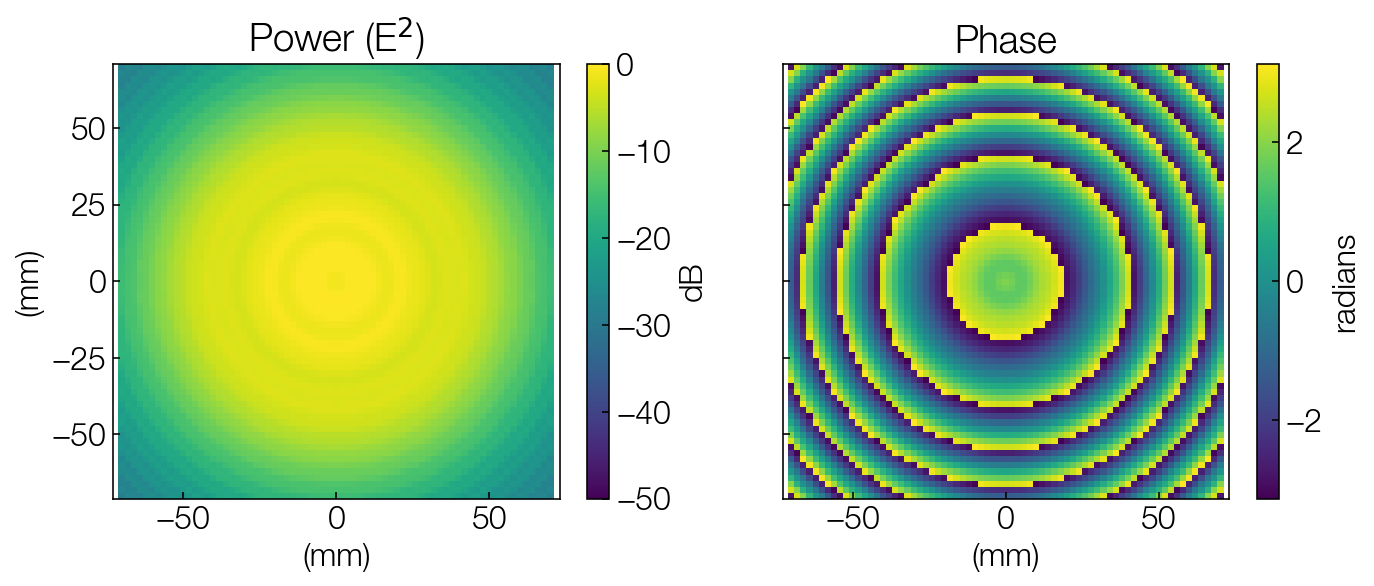

In [5]:
beam_sim = np.loadtxt(
    "/data/chesmore/latrt_ot_sim/MF_simset/source_test_1.32m_140GHz_highres.txt"
)
shape1D = int(np.sqrt(len(beam_sim[:, 0])))
X = np.reshape(beam_sim[:, 0],(shape1D,shape1D))
Y = np.reshape(beam_sim[:, 1],(shape1D,shape1D))
A = np.reshape(beam_sim[:, 2],(shape1D,shape1D))
P = np.reshape(beam_sim[:, 3],(shape1D,shape1D))

fig, (ax1,ax2) = plt.subplots(1, 2,figsize = (11,4),sharey=True)
amp_color = ax1.pcolormesh(
    X,
    Y,
    20 * np.log10(A / np.max(A)),
    vmin=-50,
    shading = 'auto'
)
ax1.set_title(r"Power (E$^2$)")
ax1.set_ylabel("[mm]")
fig.colorbar(amp_color, ax=ax1, label="dB")
ax1.set_ylabel("(mm)")
ax1.axis("equal")
ax1.set_xlabel("(mm)")

amp_color = ax2.pcolormesh(
    X,
    Y,
    P,
    shading = 'auto'
)
ax2.set_title(r"Phase")
fig.colorbar(amp_color, ax=ax2, label="radians")
ax2.axis("equal")
ax2.set_xlabel("(mm)")

plt.show()